at the end of the other notebook, there is a model object, crowd movies and trajectory plots

In [12]:
import keypoint_moseq as kpm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
project_dir = '/Users/sherry/Desktop/keypoint_moseq/test2'
config = kpm.load_config(project_dir)

## Load model

In [14]:
name = '2022_11_13-16_02_22'
results_dict = kpm.load_results(project_dir=project_dir, name=name)

## Compute moseq_df (scalar_df)

In [15]:
from keypoint_moseq.viz.util import compute_moseq_df

threshold = 0.005

moseq_df = compute_moseq_df(results_dict, config)
print('moseq_df shape is', moseq_df.shape)
moseq_df.head()

moseq_df shape is (643911, 26)


,centroid_x,centroid_y,spine4_x,spine4_y,spine3_x,spine3_y,spine2_x,spine2_y,spine1_x,spine1_y,...,left ear_x,left ear_y,heading,velocity_px_s,syllable,syllables_reindexed,frame_index,session_name,uuid,onset
0,245.080544,212.623394,206.233115,262.341012,233.773146,251.264219,247.025444,229.523557,251.362497,207.188198,...,265.507982,194.962114,-1.221973,0.000000,72,0,0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,True
1,248.295126,210.512792,243.226305,253.714849,240.685340,236.797162,242.668869,218.155256,246.946714,203.179573,...,257.640641,198.848237,-1.221973,115.366192,72,0,1,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,False
2,248.987456,208.145755,231.704538,253.883536,238.387286,236.994187,245.440354,217.821549,251.157332,201.728614,...,263.730901,196.708956,-1.234502,73.986271,72,0,2,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,False
3,249.021952,205.856755,232.010474,252.179146,238.529831,235.080427,245.524321,215.731465,251.205988,199.501549,...,263.990718,194.518105,-1.234502,68.677789,72,0,3,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,False
4,247.853888,203.215113,231.917364,250.662733,238.525716,233.277992,244.940612,213.467954,249.898636,196.790851,...,262.534722,191.146562,-1.251681,86.650928,72,0,4,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,False


### add group label

In [16]:
group_lbl_df = moseq_df[['session_name', 'uuid']].drop_duplicates(['uuid'])
group_lbl_df

,session_name,uuid
0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802
71524,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,bdc89531-a802-4011-a7c8-b7eb61f5077a
125036,21_12_10_def6a_3.top.irDLC_resnet50_moseq_exam...,696a01af-ad15-447e-858e-acc4c445243e
160854,21_12_10_def6b_3.top.irDLC_resnet50_moseq_exam...,ae30292c-9389-4d72-b084-d4fe38e5922f
214381,21_12_2_def6a_1.top.irDLC_resnet50_moseq_examp...,e51b46bd-7c0f-4b9d-8acc-a044c3e8c2cd
321888,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,08125a5c-e2da-4f87-9096-1aab72e76b41
429408,22_04_26_cage4_0.top.irDLC_resnet50_moseq_exam...,885e2548-8a99-4c65-8917-6a325f5259a5
483031,22_04_26_cage4_0_2.top.irDLC_resnet50_moseq_ex...,e3d007de-c0c0-4a7d-84bf-4f096e1b2da7
536656,22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...,6a77228f-7420-48da-8544-77db14e3f58c
590288,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,116dd2f6-aa48-40a3-a237-9f6fccab0641


In [17]:
group_lbl_df['group'] = ['a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b']

In [18]:
group_lbl_df=group_lbl_df.drop(['session_name'], axis=1)
moseq_df = pd.merge(moseq_df, group_lbl_df, how = 'right', on='uuid')

In [ ]:
moseq_df.head()

### export moseq_df

In [5]:
# import os
# moseq_df.to_csv(os.path.join(project_dir, name, 'moseq_df.csv'))

## Compute stats_df (mean_df)

In [20]:
from keypoint_moseq.viz.util import compute_stats_df

In [21]:
syll_key = 'syllables_reindexed'
threshold = 0.005
stats_df = compute_stats_df(moseq_df, threshold = threshold, groupby = ['group', 'uuid', 'session_name'], fps = 30, syll_key = syll_key, normalize = True)
print('stats_df shape is', stats_df.shape)
stats_df.head()

stats_df shape is (210, 10)


,group,uuid,session_name,syllable,usage,duration,heading_mean,heading_std,heading_min,heading_max
0,a,08125a5c-e2da-4f87-9096-1aab72e76b41,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,0,0.129237,0.455135,0.224951,1.773402,-3.141578,3.141282
1,a,696a01af-ad15-447e-858e-acc4c445243e,21_12_10_def6a_3.top.irDLC_resnet50_moseq_exam...,0,0.237266,0.551369,-0.075153,2.105580,-3.141505,3.141534
2,a,6a77228f-7420-48da-8544-77db14e3f58c,22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...,0,0.124952,0.444285,-0.174892,1.611183,-3.138876,3.140992
3,a,e51b46bd-7c0f-4b9d-8acc-a044c3e8c2cd,21_12_2_def6a_1.top.irDLC_resnet50_moseq_examp...,0,0.156143,0.479200,0.087142,1.577182,-3.141536,3.141176
4,a,f03cddc5-d97c-4a7f-a3ee-6cf6f4225802,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,0,0.136080,0.473820,0.273088,1.674038,-3.141411,3.141155


In [8]:
# import os
# stats_df.to_csv(os.path.join(project_dir, name, 'stats_df.csv'))

## MoSeq fingerprint

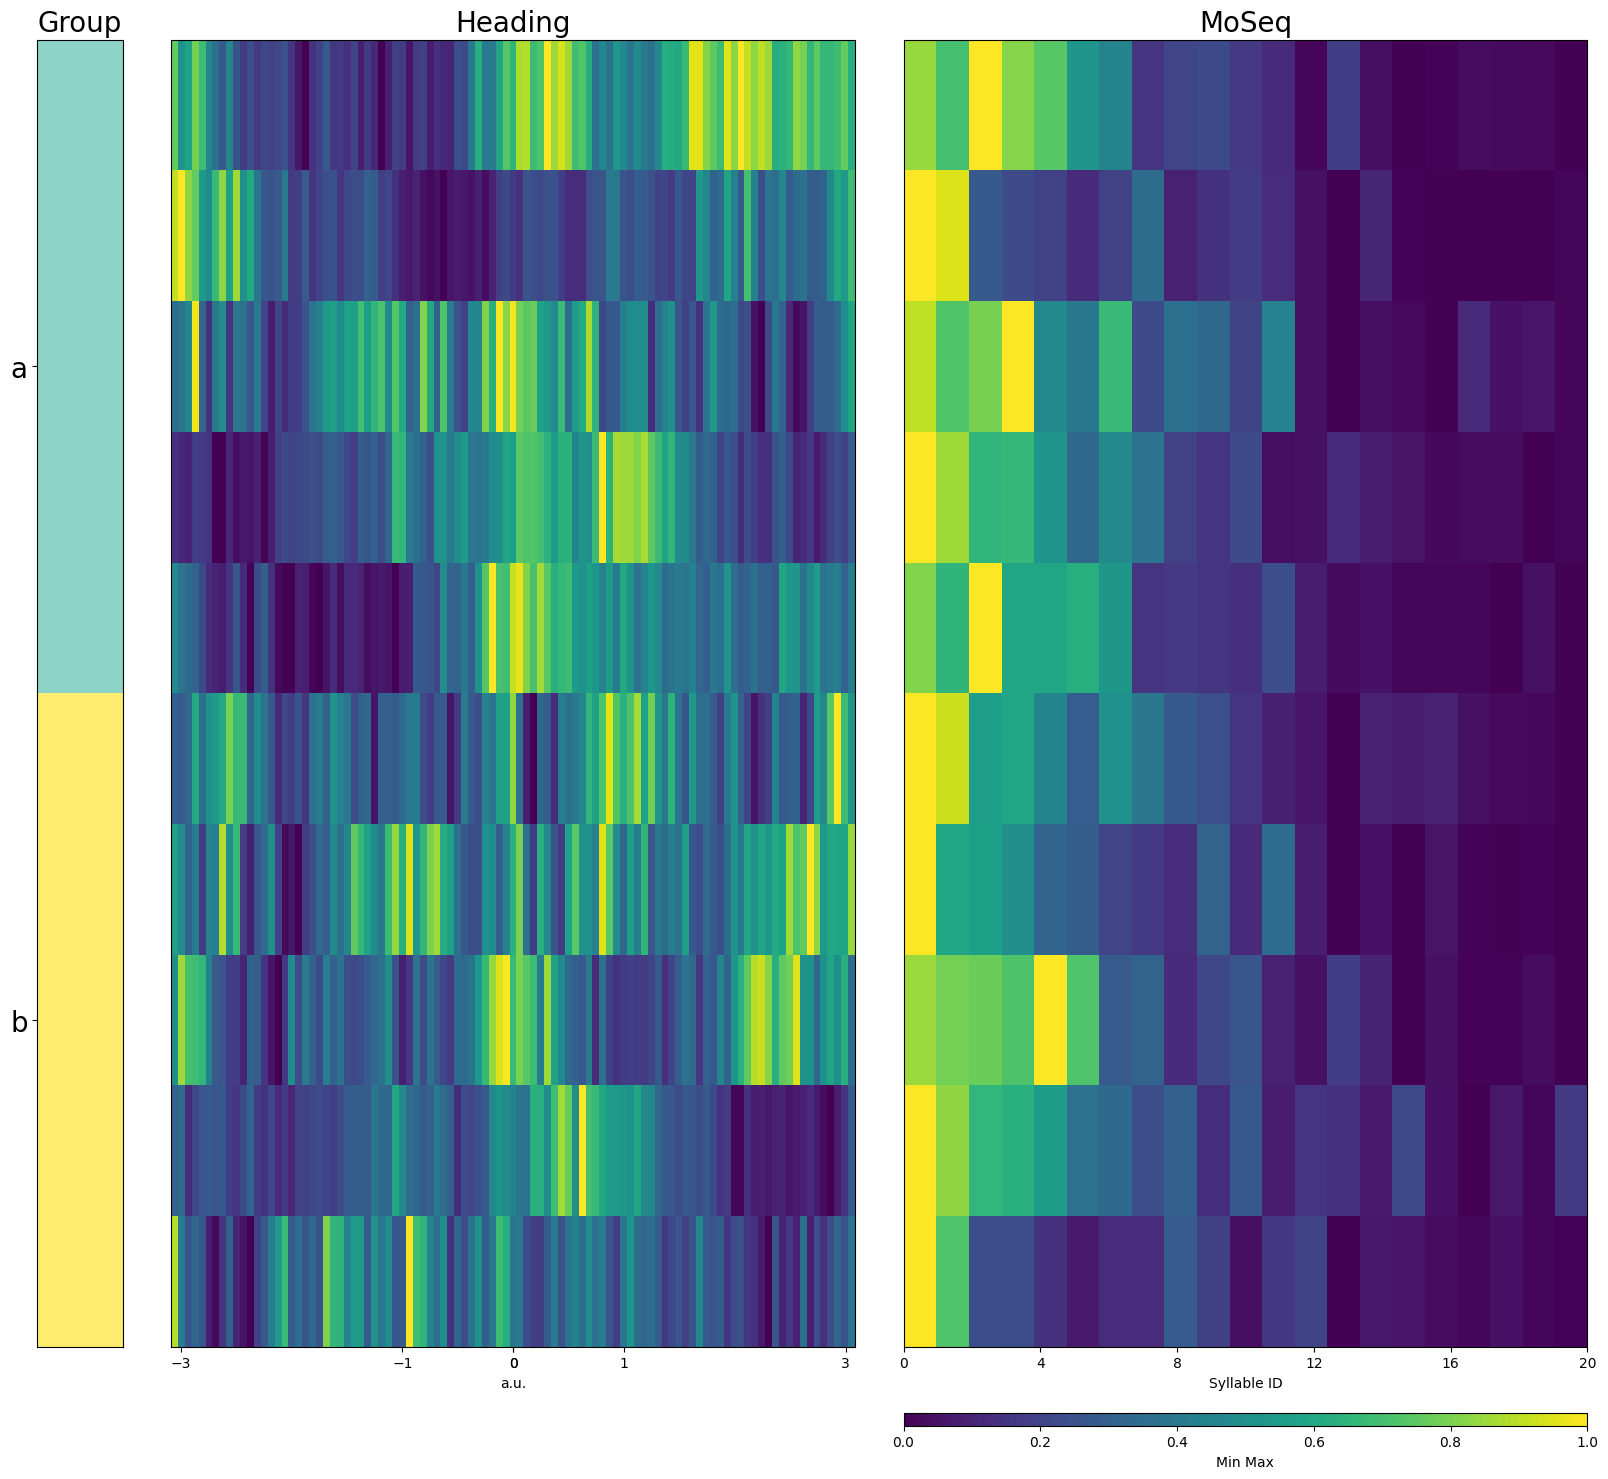

In [48]:
from keypoint_moseq.viz.util import create_fingerprint_dataframe, plotting_fingerprint
from sklearn.preprocessing import MinMaxScaler, StandardScaler

stat_type = 'mean'
n_bins = 100  # resolution of distribution 
range_type = 'robust'  # robust or full
preprocessor = MinMaxScaler()

summary, range_dict = create_fingerprint_dataframe(moseq_df, stats_df, stat_type=stat_type, n_bins=n_bins, range_type=range_type)
plotting_fingerprint(summary, range_dict, preprocessor=preprocessor)

## Usage plot

In [23]:
from keypoint_moseq.viz.util import plot_syll_stats_with_sem

/Users/sherry/Desktop/MoSeq/keypointMoSeq/keypoint_moseq/viz/util.py:514: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  palette=colors)


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.legend.Legend at 0x7faea4f24190>)

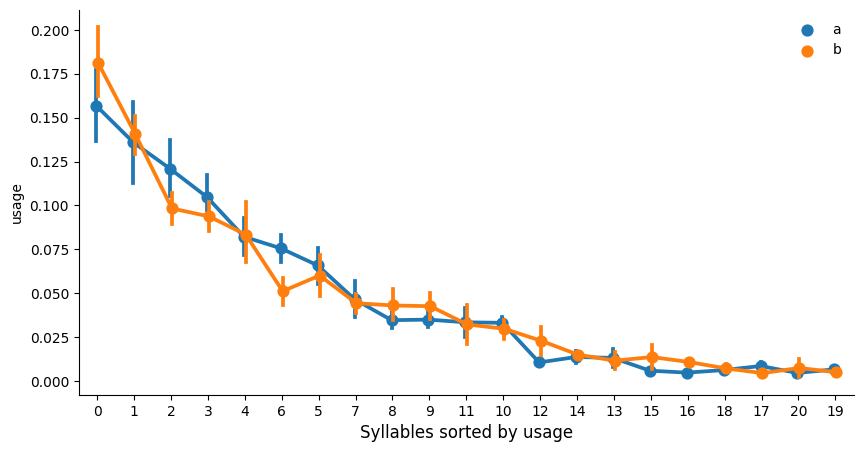

In [28]:
ordering='stat'

groups = stats_df['group'].unique()
ctrl_group='a'
exp_group='b'

join=False

plot_syll_stats_with_sem(stats_df, syll_info=None, sig_sylls=None, stat='usage', ordering=ordering, max_sylls=None,
                             groups=groups, ctrl_group=ctrl_group, exp_group=exp_group, colors=None, join=True, figsize=(10, 5))

## Transition matrices

In [29]:
from keypoint_moseq.viz.util import get_group_trans_mats

In [30]:
max_syllables = 40 
normalize='bigram'
uuid_groups = stats_df[['uuid', 'group', 'session_name']].drop_duplicates(['uuid']).to_numpy()
label_group, uuids, sessions = uuid_groups[:,1], uuid_groups[:, 0], uuid_groups[:,2]
group = list(set(label_group))
print('Group(s):', ', '.join(group))
model_labels = [results_dict[session][syll_key] for session in sessions]
trans_mats, usages = get_group_trans_mats(model_labels, label_group, group, max_sylls=max_syllables, normalize=normalize)

Group(s): a, b


Computing bigram transition probabilities: 100%|██████████| 5/5 [00:00<00:00, 213.37it/s]


20


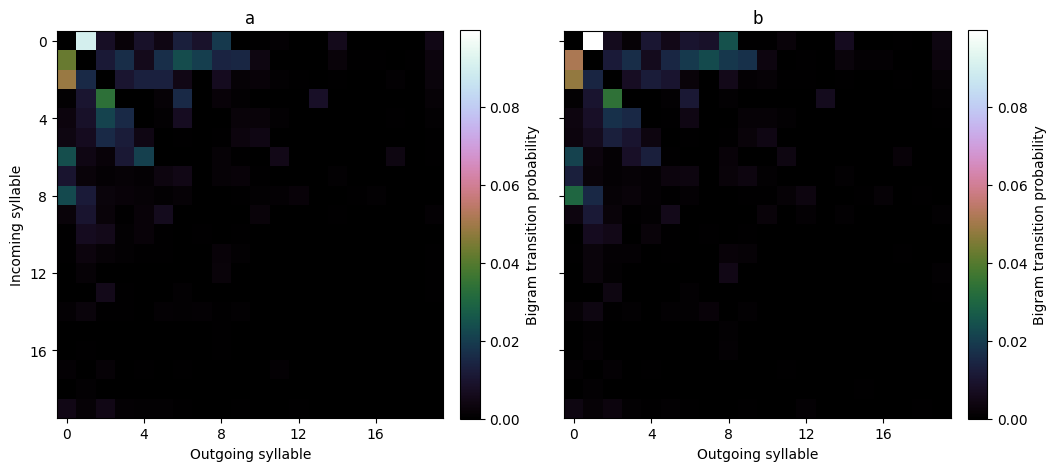

In [47]:
max_syllables = int(stats_df.syllable.max())
print(max_syllables)
fig, ax = plt.subplots(1, len(group), figsize=(12, 15), sharex=False, sharey=True)
title_map = dict(bigram='Bigram', columns='Incoming', rows='Outgoing')

# max color threshold for graphs - set to any value 
color_lim = max([x.max() for x in trans_mats])

for i, g in enumerate(group):
    h = ax[i].imshow(trans_mats[i][:max_syllables,:max_syllables], cmap='cubehelix', vmax=color_lim)
    if i == 0:
        ax[i].set_ylabel('Incoming syllable')
        plt.yticks(np.arange(0, max_syllables, 4))
    cb = fig.colorbar(h, ax=ax[i], fraction=0.046, pad=0.04)
    cb.set_label(f'{title_map[normalize]} transition probability')
    ax[i].set_xlabel('Outgoing syllable')
    ax[i].set_title(g)
    ax[i].set_xticks(np.arange(0, max_syllables, 4))
    